#                             MINOR PROJECT

Project Name:<br>
Data Science September Minor Project

Project Description:

Problem statement: Create a classification model to predict the gender (male or 
female) based on different acoustic parameters

Context: This database was created to identify a voice as male or female, based upon 
acoustic properties of the voice and speech. The dataset consists of 3,168 recorded 
voice samples, collected from male and female speakers. The voice samples are preprocessed by acoustic analysis in R using the seewave and tuneR packages, with an 
analyzed frequency range of 0hz-280hz (human vocal range).


Column Description:

• meanfreq: mean frequency (in kHz)<br>
• sd: standard deviation of frequency<br>
• median: median frequency (in kHz)<br>
• Q25: first quantile (in kHz)<br>
• Q75: third quantile (in kHz)<br>
• IQR: interquantile range (in kHz)<br>
• skew: skewness (see note in specprop description)<br>
• kurt: kurtosis (see note in specprop description)<br>
• sp.ent: spectral entropy<br>
• sfm: spectral flatness<br>
• mode: mode frequency<br>
• centroid: frequency centroid (see specprop)<br>
• peakf: peak frequency (frequency with highest energy)<br>
• meanfun: average of fundamental frequency measured across acoustic signal<br>
• minfun: minimum fundamental frequency measured across acoustic signal<br>
• maxfun: maximum fundamental frequency measured across acoustic signal<br>
• meandom: average of dominant frequency measured across acoustic signal<br>
• mindom: minimum of dominant frequency measured across acoustic signal<br>
• maxdom: maximum of dominant frequency measured across acoustic signal<br>
• dfrange: range of dominant frequency measured across acoustic signal<br>
• modindx: modulation index. Calculated as the accumulated absolute difference<br>
between adjacent measurements of fundamental frequencies divided by the<br>
frequency range<br>
• label: male or female frequency (frequency with highest energy)<br>


Dataset:

https://drive.google.com/file/d/1I32cTkoT2U--InDtRjZP3BaPpUtdZ1R6/view?usp=sharing

Steps to consider:

1)Remove/handle null values (if any)<br>
2)Depict percentage distribution of label on a pie chart<br>
3)Considering all the features as independent feature and label as dependent feature,<br>
split the dataset training and testing data with test size=20%<br>
4)Apply the following classifier models on training dataset and generate predictions for<br>
the test dataset<br>
a. Decision Tree Classifier<br>
b. Random Forest Classifier<br>
c. KNN Classifier<br>
d. Logistic Regression<br>
e. SVM Classifier<br>
5)Also generate confusion_matrix and classification report for each model generated in<br>
Q4.<br>
6)Report the model with the best accuracy<br>

# Code 

In [24]:
##: Create a classification model to predict the gender (male or female) based on different acoustic parameters

In [25]:
import pandas as pd #data processing
import numpy as np #mathematical computations
import matplotlib.pyplot as plt #visualization

In [26]:
df = pd.read_csv('voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [27]:
df.shape

(3168, 21)


# Checking for null values

In [28]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [29]:
df.duplicated().sum()

2

In [30]:
df.dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label        object
dtype: object

In [31]:
df['label'].value_counts()

male      1584
female    1584
Name: label, dtype: int64

# Handling the Categorical columns

In [32]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [33]:
df['label'].value_counts()

male      1584
female    1584
Name: label, dtype: int64

In [34]:
df['label'] = lb.fit_transform(df['label'])
df['label'].value_counts()

1    1584
0    1584
Name: label, dtype: int64

In [35]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


In [36]:
df.dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label         int32
dtype: object

In [37]:
df.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [38]:
x = df.drop('label',axis=1)
y = df['label']
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(3168, 20)
(3168,)


In [39]:
x.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


In [40]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int32

# Spliting the training data  and testing data

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
0.20*3168

633.6

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2534, 20)
(634, 20)
(2534,)
(634,)


In [44]:
x_train.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
1109,0.182813,0.058998,0.162857,0.137959,0.237551,0.099592,1.361351,4.698105,0.917399,0.414762,0.140816,0.182813,0.137282,0.047809,0.279070,1.078635,0.023438,4.875000,4.851562,0.179363
1108,0.193563,0.061596,0.204000,0.137333,0.250667,0.113333,0.901382,3.251373,0.922266,0.373547,0.276444,0.193563,0.118220,0.046921,0.279070,1.195791,0.023438,5.320312,5.296875,0.187572
3103,0.163121,0.057343,0.172697,0.160052,0.185884,0.025832,5.241166,35.342732,0.880084,0.456706,0.171794,0.163121,0.146714,0.010776,0.232558,0.819770,0.170898,3.706055,3.535156,0.378241
2868,0.209865,0.037842,0.212121,0.194705,0.233557,0.038852,1.562059,4.462272,0.865804,0.273495,0.209888,0.209865,0.174650,0.048048,0.279070,0.854651,0.023438,5.578125,5.554688,0.054186
230,0.124883,0.077808,0.113888,0.068899,0.201034,0.132135,3.990390,24.360696,0.927987,0.617386,0.000000,0.124883,0.116251,0.017410,0.258065,0.149414,0.007812,0.734375,0.726562,0.198157


In [45]:
y_train.head()

1109    1
1108    1
3103    0
2868    0
230     1
Name: label, dtype: int32

In [46]:
x_test.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
1681,0.135013,0.077275,0.130314,0.069266,0.207505,0.138239,4.096389,45.889237,0.974285,0.822230,0.050189,0.135013,0.137531,0.017297,0.275862,0.130409,0.046875,0.507812,0.460938,0.166780
839,0.178536,0.057605,0.188939,0.138296,0.206470,0.068174,2.532186,11.531465,0.903636,0.396396,0.200139,0.178536,0.133616,0.049332,0.277457,1.197656,0.023438,7.617188,7.593750,0.201587
1482,0.194074,0.068020,0.211194,0.159170,0.248889,0.089719,1.681314,6.282421,0.948920,0.643015,0.268898,0.194074,0.111646,0.017719,0.246154,0.767578,0.242188,6.046875,5.804688,0.137003
1258,0.181020,0.059629,0.163738,0.137570,0.234393,0.096822,1.541186,5.231348,0.924803,0.468433,0.135701,0.181020,0.139198,0.047244,0.279070,1.431526,0.023438,5.578125,5.554688,0.137418
293,0.097464,0.093731,0.060057,0.008808,0.159352,0.150543,10.812681,148.817031,0.878622,0.533373,0.060057,0.097464,0.089682,0.016211,0.275862,0.292295,0.007812,5.054688,5.046875,0.105927


In [47]:
y_test.head()

1681    0
839     1
1482    1
1258    1
293     1
Name: label, dtype: int32

# Creating functions  to compute the confusion_matrix,calassification report and to generate training and testing score

In [48]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [49]:
def eval_model(ytest,ypred):
    cm  = confusion_matrix(ytest,ypred)
    print(cm)
    print('Accuracy Score',accuracy_score(ytest,ypred))
    print(classification_report(ytest,ypred,zero_division=0))
    
    
def mscore(model):
    print('Training Score',model.score(x_train,y_train))
    print('Testing Score',model.score(x_test,y_test))

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# 1) LogisticRegression

In [51]:
m1 = LogisticRegression(max_iter=1000,solver='liblinear')
m1.fit(x_train,y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [52]:
mscore(m1)


Training Score 0.9060773480662984
Testing Score 0.917981072555205


In [53]:
ypred_m1=m1.predict(x_test)

In [54]:
eval_model(y_test,ypred_m1)

[[275  43]
 [  9 307]]
Accuracy Score 0.917981072555205
              precision    recall  f1-score   support

           0       0.97      0.86      0.91       318
           1       0.88      0.97      0.92       316

    accuracy                           0.92       634
   macro avg       0.92      0.92      0.92       634
weighted avg       0.92      0.92      0.92       634



# 2) Decision Tree

In [55]:
m2 = DecisionTreeClassifier(criterion='gini',max_depth=13,min_samples_split=15)
m2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=13, min_samples_split=15)

In [56]:
mscore(m2)

Training Score 0.9877663772691397
Testing Score 0.9779179810725552


In [57]:
ypred_m2=m2.predict(x_test)

In [58]:
eval_model(y_test,ypred_m2)

[[311   7]
 [  7 309]]
Accuracy Score 0.9779179810725552
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       318
           1       0.98      0.98      0.98       316

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



# 3) Kneighbors Classifier

In [59]:
m3=KNeighborsClassifier(n_neighbors=10)
m3.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [60]:
mscore(m3)

Training Score 0.7600631412786109
Testing Score 0.7082018927444795


In [61]:
ypred_m3=m3.predict(x_test)

In [62]:
eval_model(y_test,ypred_m3)

[[225  93]
 [ 92 224]]
Accuracy Score 0.7082018927444795
              precision    recall  f1-score   support

           0       0.71      0.71      0.71       318
           1       0.71      0.71      0.71       316

    accuracy                           0.71       634
   macro avg       0.71      0.71      0.71       634
weighted avg       0.71      0.71      0.71       634



# 4) Random Forest Classifier

In [63]:
m4 = RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=15,min_samples_split=20)
m4.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_split=20)

In [64]:
mscore(m4)

Training Score 0.98973954222573
Testing Score 0.9905362776025236


In [65]:
ypred_m4=m4.predict(x_test)

In [66]:
eval_model(y_test,ypred_m4)

[[315   3]
 [  3 313]]
Accuracy Score 0.9905362776025236
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       318
           1       0.99      0.99      0.99       316

    accuracy                           0.99       634
   macro avg       0.99      0.99      0.99       634
weighted avg       0.99      0.99      0.99       634



# 5) Support vector machine(svm)

In [67]:
m5=SVC(kernel='linear',C=1)
m5.fit(x_train,y_train)

SVC(C=1, kernel='linear')

In [68]:
mscore(m5)

Training Score 0.920284135753749
Testing Score 0.9369085173501577


In [69]:
ypred_m5=m5.predict(x_test)

In [70]:
eval_model(y_test,ypred_m5)

[[283  35]
 [  5 311]]
Accuracy Score 0.9369085173501577
              precision    recall  f1-score   support

           0       0.98      0.89      0.93       318
           1       0.90      0.98      0.94       316

    accuracy                           0.94       634
   macro avg       0.94      0.94      0.94       634
weighted avg       0.94      0.94      0.94       634



### From above all classifiers we can come to know that 
1)Logistic Regression has accuracy =0.92<br>
2)Decision Tree has accuracy =0.97<br>
3)KNeighbors Classifier has accuracy=0.70<br>
4)Random Forest Classifier has accuracy=0.97<br>
5)Support Vector Machine has accuracy=0.93<br>


Out of all the above five(5) models <br> These two has best accuracy rate<br>
Decision Tree and Random Forest Classifier has best accuracy rate with 0.97

# percentage distribution of label on a pie chart

In [71]:
r1 = df['label'].value_counts()
r1

1    1584
0    1584
Name: label, dtype: int64

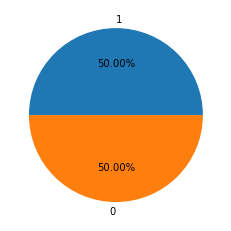

In [72]:
plt.pie(r1.values,labels=r1.index,autopct='%.2f%%')
plt.show()

# PIE CHART

# --------******************--------------****************THE END****************-----------------*******************-------------